In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import qml
import shapely.geometry as sg

In [4]:
c = qml.Compound('../samples/indigo.xyz')

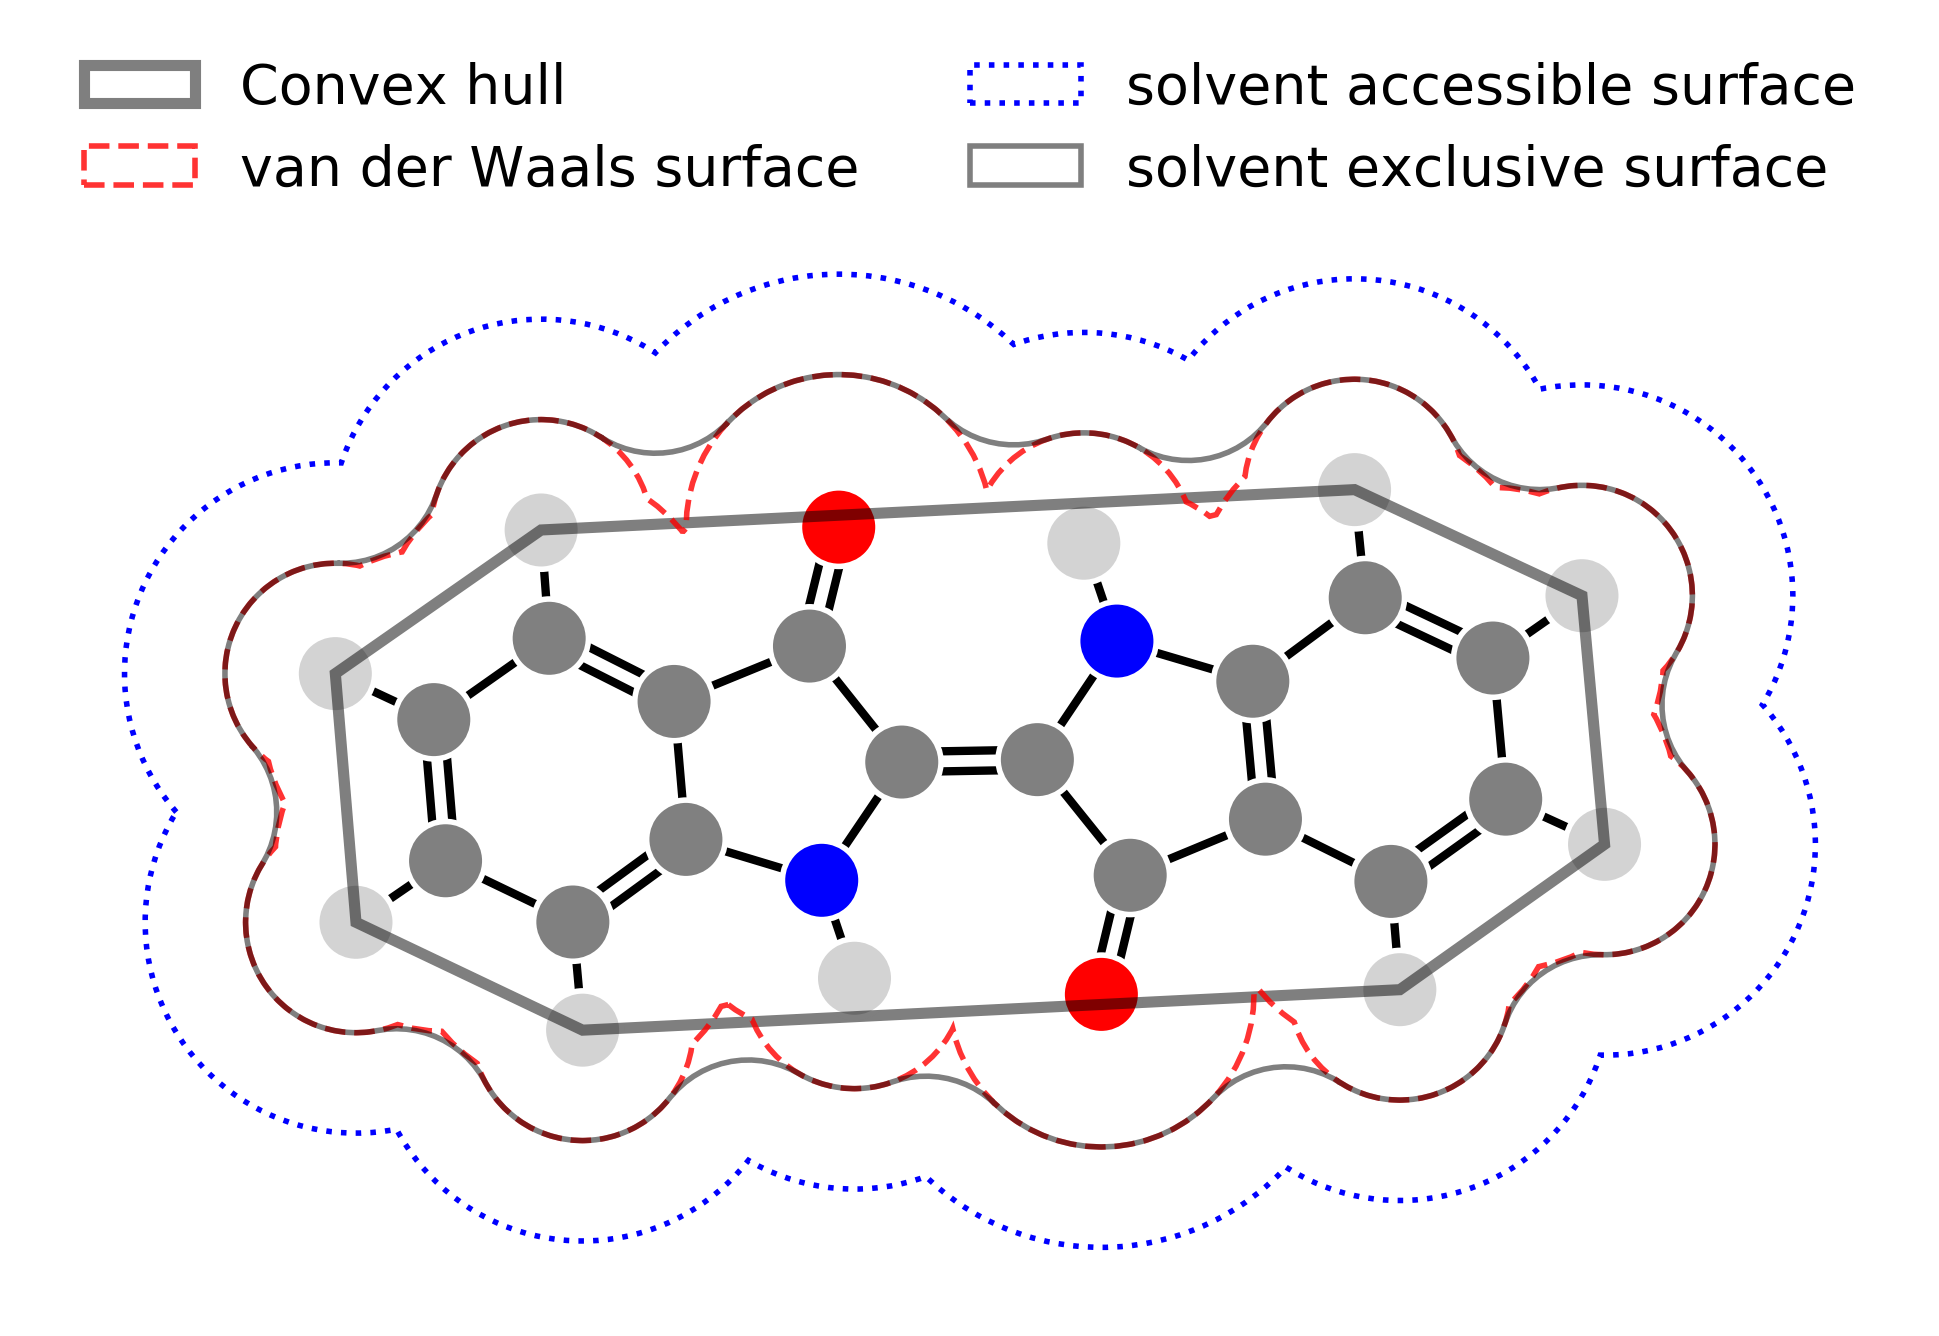

In [5]:
f, axs = plt.subplots(1, 1, dpi=400)
axs.set_aspect('equal')
colors = {6: 'grey', 1: 'lightgrey', 7: 'blue', 8: 'red'}
outlinecolors = {6: 'white', 1: 'white', 7: 'white', 8: 'white'}
axs.scatter(c.coordinates[:, 0], c.coordinates[:, 1],edgecolors=[outlinecolors[_] for _ in c.nuclear_charges], c=[colors[_] for _ in c.nuclear_charges], s=200)
def draw_bond(a, b, order):
    if order == 2:
        delta = c.coordinates[b, 0:2] - c.coordinates[a, 0:2]
        delta[1] *= -1
        delta = np.array((delta[1], delta[0]))
        delta /= np.linalg.norm(delta)
        shift = delta*0.1
        xs = c.coordinates[[a, b], 0] + shift[0]
        ys = c.coordinates[[a, b], 1] + shift[1]
        plt.plot(xs, ys, color='black', zorder=-1)
        xs = c.coordinates[[a, b], 0] - shift[0]
        ys = c.coordinates[[a, b], 1] - shift[1]
        plt.plot(xs, ys, color='black', zorder=-1)
    else:
        plt.plot(c.coordinates[[a, b], 0], c.coordinates[[a, b], 1], color='black', zorder=-1)
#for aidx in range(c.natoms):
#    axs.text(c.coordinates[aidx, 0], c.coordinates[aidx, 1], str(aidx))
        
draw_bond(0, 1, 1)
draw_bond(2, 1, 2)
draw_bond(2, 3, 1)
draw_bond(3, 4, 2)
draw_bond(5, 6, 1)
draw_bond(7, 8, 2)
draw_bond(9, 3, 1)
draw_bond(10, 1, 1)
draw_bond(11, 2, 1)
draw_bond(12, 0, 1)
draw_bond(5, 0, 2)
draw_bond(5, 4, 1)
draw_bond(6, 15, 2)
draw_bond(4, 13, 1)
draw_bond(7, 13, 1)
draw_bond(7, 6, 1)
draw_bond(13,14, 1)
draw_bond(28,27, 1)
draw_bond(8,27, 1)
draw_bond(16,29, 2)
draw_bond(16,8, 1)
draw_bond(27,18, 1)
draw_bond(17,18, 2)
draw_bond(16,17, 1)
draw_bond(18,19, 1)
draw_bond(20,19, 2)
draw_bond(21,22, 2)
draw_bond(21,25, 1)
draw_bond(21,20, 1)
draw_bond(20,24, 1)
draw_bond(23,19, 1)
draw_bond(22,17, 1)
draw_bond(26,22, 1)

# vdw
radii = {1: 110, 6: 170, 7:155, 8:152}
union = None
ssa = None
for aidx in range(c.natoms):
    radius = radii[c.nuclear_charges[aidx]]/100
    xy = (c.coordinates[aidx, 0], c.coordinates[aidx, 1])
    circle = Circle(xy, radius, facecolor='none', edgecolor='black')
    #axs.add_patch(circle)
    point = sg.Point(*xy)
    if union is None:
        union = point.buffer(radius)
        ssa = point
    else:
        union = union.union(point.buffer(radius))
        ssa = ssa.union(point)

xs, ys = sg.MultiPoint(c.coordinates[:, 0:2]).convex_hull.exterior.xy
convex = axs.fill(xs, ys, alpha=0.5, fc='none', ec='black', linewidth=2)

xs, ys = union.exterior.xy
vdw = axs.fill(xs, ys, linestyle='--',  fc='none', ec='red',alpha=0.8)

xs, ys = union.exterior.buffer(1).exterior.xy
ssa = axs.fill(xs, ys, linestyle=':', fc='none', ec='blue')

# workaround for geos bug
coords = union.exterior.buffer(1).exterior.coords
offset = 1
xs, ys = sg.polygon.LinearRing(coords[offset:] + coords[:offset]).parallel_offset(1).xy
ses = axs.fill(xs, ys, linestyle='-', alpha=0.5, fc='none', ec='black')

axs.set_xticks([])
axs.set_yticks([])
axs.axis('off')
plt.legend([convex[0], vdw[0], ssa[0], ses[0]], ['Convex hull', 'van der Waals surface', 'solvent accessible surface', 'solvent exclusive surface'], ncol=2, loc='upper center', bbox_to_anchor=(0.5, 1.2), frameon=False)
plt.savefig('convexhull.pdf', bbox_inches='tight')